## 데이터 불러오기

In [2]:
### 구글 colab과 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [3]:
### 데이터 불러오기

# 파일 경로 설정
file_path='/content/drive/MyDrive/데이터분석/titanic_cleaned.csv'

# pd.read_csv() 사용
df = pd.read_csv(file_path)

# 결과 확인하기
print(df)

      Survived  Pclass  Gender  Age  SibSp  Parch      Fare  num_family  \
0            0       3    male    2      1      0    7.2500           1   
1            1       1  female    3      1      0   71.2833           1   
2            1       3  female    2      0      0    7.9250           0   
3            1       1  female    3      1      0   53.1000           1   
4            0       3    male    3      0      0    8.0500           0   
...        ...     ...     ...  ...    ...    ...       ...         ...   
1304         0       3    male    2      0      0    8.0500           0   
1305         1       1  female    3      0      0  108.9000           0   
1306         0       3    male    3      0      0    7.2500           0   
1307         0       3    male    2      0      0    8.0500           0   
1308         0       3    male    2      1      1   22.3583           2   

       title  
0         Mr  
1        Mrs  
2       Miss  
3        Mrs  
4         Mr  
...      

### 데이터 전처리 : label encoding

In [4]:
### replace() 함수 사용 --> lable encoding

# 대상 컬럼 : Gender, Embarked, honorific
df = df.replace({'female':0, 'male':1, 'C':0, 'Q':1, 'S':2, 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4})

# 결과 확인하기
print(df)

      Survived  Pclass  Gender  Age  SibSp  Parch      Fare  num_family  title
0            0       3       1    2      1      0    7.2500           1      2
1            1       1       0    3      1      0   71.2833           1      3
2            1       3       0    2      0      0    7.9250           0      1
3            1       1       0    3      1      0   53.1000           1      3
4            0       3       1    3      0      0    8.0500           0      2
...        ...     ...     ...  ...    ...    ...       ...         ...    ...
1304         0       3       1    2      0      0    8.0500           0      2
1305         1       1       0    3      0      0  108.9000           0      4
1306         0       3       1    3      0      0    7.2500           0      2
1307         0       3       1    2      0      0    8.0500           0      2
1308         0       3       1    2      1      1   22.3583           2      0

[1309 rows x 9 columns]


## 학습용 데이터와 평가용 데이터 생성

In [5]:
# 필요한 라이브러리 임폴트
from sklearn.model_selection import train_test_split

# X_data 생성
X_data = df.drop(columns=['Survived'])
print(f'X_data 확인 : \n{X_data}')

print('-'*80)

# y_data 생성
y_data = df.loc[:, 'Survived']
print(f'y_data 확인 : \n{y_data}')

print('-'*80)

# 정답 분포 확인 --> y_data의 항목별 비율 추출
ratio = y_data.value_counts(normalize=True)
print(f'정답의 분포 비율 확인 : \n{ratio}')

print('-'*80)

# train_test_split() 사용
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y_data)

X_data 확인 : 
      Pclass  Gender  Age  SibSp  Parch      Fare  num_family  title
0          3       1    2      1      0    7.2500           1      2
1          1       0    3      1      0   71.2833           1      3
2          3       0    2      0      0    7.9250           0      1
3          1       0    3      1      0   53.1000           1      3
4          3       1    3      0      0    8.0500           0      2
...      ...     ...  ...    ...    ...       ...         ...    ...
1304       3       1    2      0      0    8.0500           0      2
1305       1       0    3      0      0  108.9000           0      4
1306       3       1    3      0      0    7.2500           0      2
1307       3       1    2      0      0    8.0500           0      2
1308       3       1    2      1      1   22.3583           2      0

[1309 rows x 8 columns]
--------------------------------------------------------------------------------
y_data 확인 : 
0       0
1       1
2       1
3       1


In [ ]:
### 학습용 데이터 확인
print(f'X_train 모양 확인 : {X_train.shape}')
print('-'*80)
print(f'y_train 모양 확인 : {y_train.shape}')
print('-'*80)
print(f'X_train의 인덱스 확인  :\n{X_train.index}')
print('-'*80)
print(f'y_train의 인덱스 확인 : \n{y_train.index}')
print('-'*80)
print(f'정답의 분포 비율 확인 : \n{y_train.value_counts(normalize=True)}')

X_train 모양 확인 : (916, 8)
--------------------------------------------------------------------------------
y_train 모양 확인 : (916,)
--------------------------------------------------------------------------------
X_train의 인덱스 확인  :
Index([ 867, 1230,  238,   12,  521,  931,  717, 1030,  481, 1282,
       ...
        122,  767,  634,  547,  683, 1256, 1232,  906, 1239,  403],
      dtype='int64', length=916)
--------------------------------------------------------------------------------
y_train의 인덱스 확인 : 
Index([ 867, 1230,  238,   12,  521,  931,  717, 1030,  481, 1282,
       ...
        122,  767,  634,  547,  683, 1256, 1232,  906, 1239,  403],
      dtype='int64', length=916)
--------------------------------------------------------------------------------
정답의 분포 비율 확인 : 
Survived
0    0.622271
1    0.377729
Name: proportion, dtype: float64


In [6]:
### 평가용 데이터 확인
print(f'X_test 모양 확인 : {X_test.shape}')
print('-'*80)
print(f'y_test 모양 확인 : {y_test.shape}')
print('-'*80)
print(f'X_test의 인덱스 확인  :\n{X_test.index}')
print('-'*80)
print(f'y_test의 인덱스 확인 : \n{y_test.index}')
print('-'*80)
print(f'정답의 분포 비율 확인 : \n{y_test.value_counts(normalize=True)}')

X_test 모양 확인 : (393, 8)
--------------------------------------------------------------------------------
y_test 모양 확인 : (393,)
--------------------------------------------------------------------------------
X_test의 인덱스 확인  :
Index([1270,  135,  132, 1213,  379,  792,  551, 1302,  441,  701,
       ...
       1041,  336,   42,  230, 1126, 1056, 1100,  384,  471,  932],
      dtype='int64', length=393)
--------------------------------------------------------------------------------
y_test의 인덱스 확인 : 
Index([1270,  135,  132, 1213,  379,  792,  551, 1302,  441,  701,
       ...
       1041,  336,   42,  230, 1126, 1056, 1100,  384,  471,  932],
      dtype='int64', length=393)
--------------------------------------------------------------------------------
정답의 분포 비율 확인 : 
Survived
0    0.62341
1    0.37659
Name: proportion, dtype: float64


## DecisionTree 모델을 이용한 분류

### 모델 생성

In [7]:
# 모델 생성 함수 임폴트
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 함수 호출, 모델 생성
dt =  DecisionTreeClassifier(random_state=0)

### 모델 학습

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### 학습 결과 시각화

In [9]:
### 모델 학습 시 생성된 의사 결정 트리의 깊이 확인
depth = dt.get_depth()
print(f'생성된 의사 결정 트리의 최대 깊이 : {depth}')

생성된 의사 결정 트리의 최대 깊이 : 23


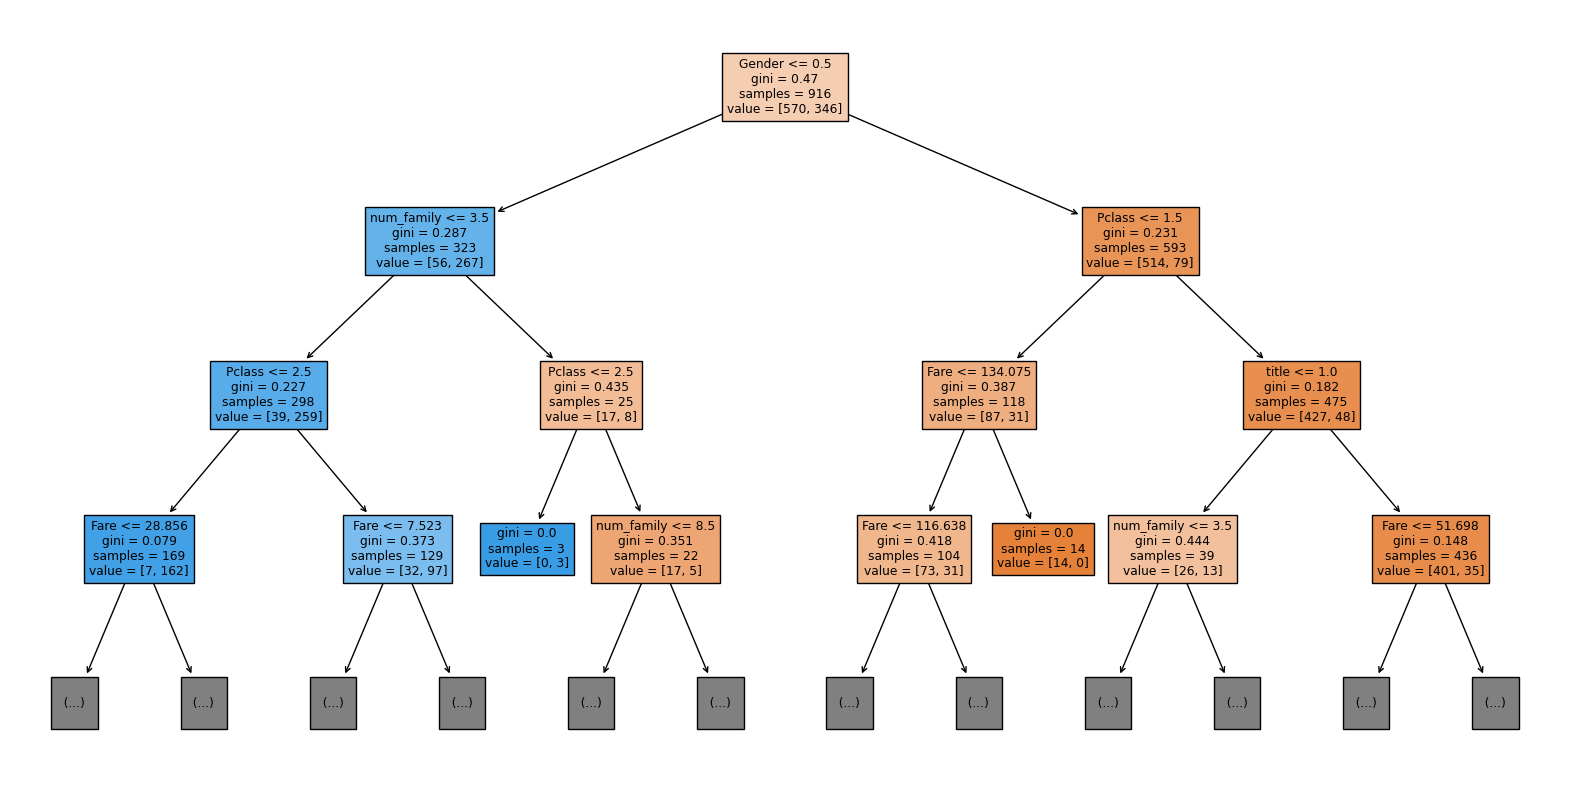

In [10]:
### 의사 결정 트리 구조 시각화

# 필요한 라이브러리 / 함수 임폴트
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 이미지 크기 설정
plt.figure(figsize=(20,10))

# 트리 구조 시각화
plot_tree(dt, max_depth=3, feature_names=X_train.columns, filled=True)
plt.show()

### 학습용 / 평가용 데이터를 이용한 예측

In [11]:
# 학습용 데이터를 이용한 예측
pred_train = dt.predict(X_train)
print(f'학습용 데이터에 대한 예측의 결과값 : \n{pred_train}')

학습용 데이터에 대한 예측의 결과값 : 
[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0
 0

In [12]:
### 평가용 데이터를 이용한 예측
pred_test = dt.predict(X_test)

### 모델 평가

In [13]:
# 정확도 평가 함수 임폴트
from sklearn.metrics import classification_report

# 학습용 데이터에 대한 성능 평가
train_performance = classification_report(y_train, pred_train)

# 평가용 데이터에 대한 성능 평가
test_performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f'학습용 데이터에 대한 성능 = \n{train_performance}')
print('-'*80)
print(f'평가용 데이터에 대한 성능 = \n{test_performance}')

학습용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       570
           1       0.97      0.91      0.94       346

    accuracy                           0.96       916
   macro avg       0.96      0.95      0.95       916
weighted avg       0.96      0.96      0.95       916

--------------------------------------------------------------------------------
평가용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       245
           1       0.80      0.69      0.74       148

    accuracy                           0.82       393
   macro avg       0.82      0.79      0.80       393
weighted avg       0.82      0.82      0.82       393



### GridSearchCV를 이용한 모델 최적화

#### 모델 생성

In [14]:
# GridSearchCV 생성 함수 임폴트
from sklearn.model_selection import GridSearchCV

# 최적화할 모델 생성
base_dt = DecisionTreeClassifier(random_state=0)

# 튜닝할 매개변수 설정
params = {'max_depth':[3,4,5,6,7,8,9]}

# GirdSearchCV 함수 호출, 모델 생성
grid_dt = GridSearchCV(
    estimator=base_dt,
    param_grid=params,
    scoring='accuracy',
    cv=10
)

# GirdSearchCV 학습 및 평가
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [15]:
### 최적의 성능을 나타내는 하이퍼파리미터 확인
print(grid_dt.best_params_)

{'max_depth': 3}


In [16]:
### best 모델 생성
best_dt = DecisionTreeClassifier(max_depth=3,random_state=0)

#### 모델 학습

In [17]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### 학습용 / 평가용 데이터에 대한 예측

In [18]:
### 학습용 데이터에 대한 예측
pred_train = best_dt.predict(X_train)

In [19]:
### 평가용 데이터에 대한 예측
pred_test = best_dt.predict(X_test)

#### 모델 평가

In [20]:
# 정확도 평가 함수 임폴트
from sklearn.metrics import classification_report

# 학습용 데이터에 대한 성능 평가
train_performance = classification_report(y_train, pred_train)

# 평가용 데이터에 대한 성능 평가
test_performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f'학습용 데이터에 대한 성능 = \n{train_performance}')
print('-'*80)
print(f'평가용 데이터에 대한 성능 = \n{test_performance}')

학습용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       570
           1       0.87      0.76      0.81       346

    accuracy                           0.87       916
   macro avg       0.87      0.84      0.85       916
weighted avg       0.87      0.87      0.86       916

--------------------------------------------------------------------------------
평가용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       245
           1       0.86      0.78      0.82       148

    accuracy                           0.87       393
   macro avg       0.87      0.85      0.86       393
weighted avg       0.87      0.87      0.87       393



### 결과 시각화

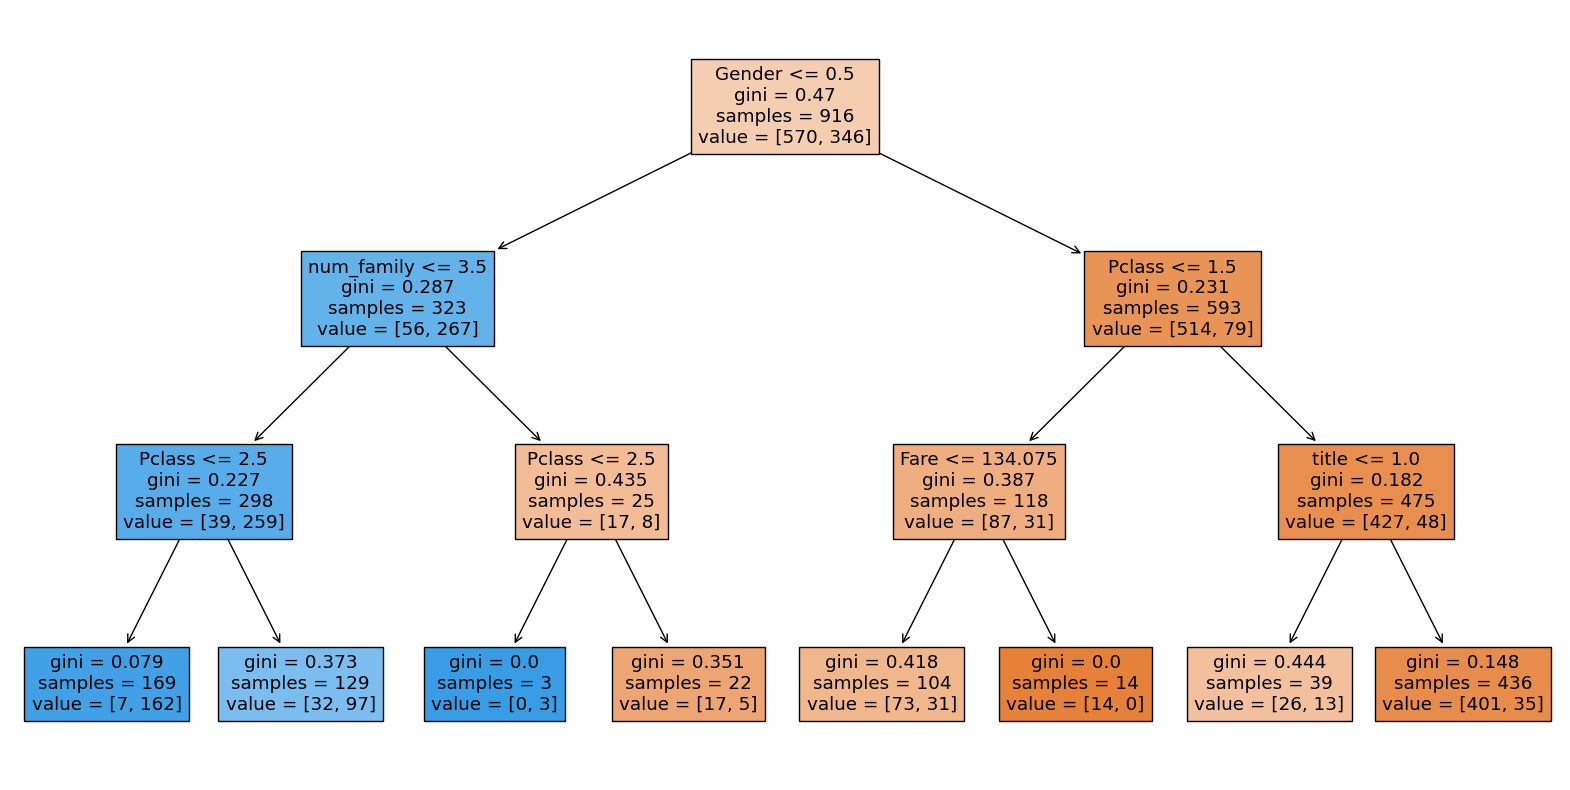

In [ ]:
# 필요한 함수 임폴트
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지 크기 재설정
plt.figure(figsize=(20,10))

# plot_tree() 사용
plot_tree(best_dt, feature_names=X_train.columns, filled=True)
plt.show()

## RandomForest 모델을 이용한 분류

### 모델 생성

In [21]:
# 모델 생성 함수 임폴트
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 함수 호출, 모델 생성
rf = RandomForestClassifier(random_state=0)

### 모델 학습

In [22]:
### fit() 함수 사용
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### 학습용 / 평가용 데이터를 이용한 예측

In [24]:
# 학습용 데이터를 이용한 예측
pred_train = rf.predict(X_train)

In [25]:
# 평가용 데이터를 이용한 예측
pred_test = rf.predict(X_test)
print(pred_test)

[1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1]


### 모델 평가

In [26]:
# 정확도 평가 함수 임폴트
from sklearn.metrics import classification_report

# 학습용 데이터에 대한 성능 평가
train_performance = classification_report(y_train, pred_train)

# 평가용 데이터에 대한 성능 평가
test_performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f'학습용 데이터에 대한 성능 = \n{train_performance}')
print('-'*80)
print(f'평가용 데이터에 대한 성능 = \n{test_performance}')

학습용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       570
           1       0.94      0.94      0.94       346

    accuracy                           0.96       916
   macro avg       0.95      0.95      0.95       916
weighted avg       0.96      0.96      0.96       916

--------------------------------------------------------------------------------
평가용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       245
           1       0.79      0.80      0.80       148

    accuracy                           0.84       393
   macro avg       0.83      0.84      0.84       393
weighted avg       0.85      0.84      0.85       393



### GridSearchCV를 이용한 모델 최적화

#### 모델 생성

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV

# 최적화할 기본 모델 생성
base_rf = RandomForestClassifier(random_state=0)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[100, 200, 300, 350, 400, 450, 500],
          'max_depth':[3,4,5,6,7]}

# GridSearchCV 함수 호출, 모델 생성
grid_rf = GridSearchCV(
    estimator=base_rf,
    param_grid=params,
    scoring='accuracy',
    cv=10
)

# 모델 학습 및 평가
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 350, 400, 450, 500]},
             scoring='accuracy')

In [ ]:
### 최적의 성능일때의 하이퍼파라미터 조합 확인
print(grid_rf.best_params_)

{'max_depth': 4, 'n_estimators': 500}


In [ ]:
### best 모델 생성
best_rf = RandomForestClassifier(max_depth=4, n_estimators=500, random_state=0)

#### 모델 학습

In [ ]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=0)

#### 학습용 / 평가용 데이터에 대한 예측

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = best_rf.predict(X_train)

In [ ]:
# 평가용 데이터에 대한 예측
pred_test = best_rf.predict(X_test)

#### 모델 평가

In [ ]:
# 정확도 평가 함수 임폴트
from sklearn.metrics import classification_report

# 학습용 데이터에 대한 성능 평가
train_performance = classification_report(y_train, pred_train)

# 평가용 데이터에 대한 성능 평가
test_performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f'학습용 데이터에 대한 성능 = \n{train_performance}')
print('-'*80)
print(f'평가용 데이터에 대한 성능 = \n{test_performance}')

학습용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       570
           1       0.87      0.77      0.81       346

    accuracy                           0.87       916
   macro avg       0.87      0.85      0.86       916
weighted avg       0.87      0.87      0.87       916

--------------------------------------------------------------------------------
평가용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       245
           1       0.86      0.78      0.82       148

    accuracy                           0.87       393
   macro avg       0.87      0.85      0.86       393
weighted avg       0.87      0.87      0.87       393



## LightGBM 모델을 이용한 분류

### 모델 생성

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 임폴트
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# 최적화할 기본 모델 생성
base_lgbm = LGBMClassifier(random_state=0,
                           bagging_seed=0,
                           feature_fraction_seed=0,
                           data_random_seed=0,
                           drop_seed=0,
                           verbose=-1)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[50, 100, 150, 200],
          'learning_rate':[0.01, 0.05, 0.1, 0.3],
          'max_depth':[3, 5, 7]}

# GridSearchCV 함수 실행, 모델 생성
grid_lgbm = GridSearchCV(
    estimator=base_lgbm,
    param_grid=params,
    scoring='accuracy',
    cv=10
)

# 학습 및 평가
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LGBMClassifier(bagging_seed=0, data_random_seed=0,
                                      drop_seed=0, feature_fraction_seed=0,
                                      random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_lgbm.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
### best 모델 생성
best_lgbm = LGBMClassifier(learning_rate=0.01,
                           n_estimators=100,
                           max_depth=3,
                           random_state=0,
                           bagging_seed=0,
                           feature_fraction_seed=0,
                           data_random_seed=0,
                           drop_seed=0,
                           verbose=-1)

### 모델 학습

In [ ]:
best_lgbm.fit(X_train, y_train)

LGBMClassifier(bagging_seed=0, data_random_seed=0, drop_seed=0,
               feature_fraction_seed=0, learning_rate=0.01, max_depth=3,
               random_state=0, verbose=-1)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_lgbm.predict(X_test)

### 모델 평가

In [ ]:
# 정확도 평가 함수 임폴트
from sklearn.metrics import classification_report

# 평가용 데이터에 대한 성능 평가
test_performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 성능 = \n{test_performance}')

평가용 데이터에 대한 성능 = 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       245
           1       0.86      0.78      0.82       148

    accuracy                           0.87       393
   macro avg       0.87      0.85      0.86       393
weighted avg       0.87      0.87      0.87       393

